<a href="https://colab.research.google.com/github/Balla01/Symptom-Based-Diagnosis-of-Diseases/blob/main/diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
af=pd.read_excel("/content/diseases4.0.xlsx")           #original dataset
af

,SYMPTOMS,DISEASES
0,bathed,feaver
1,drenched,feaver
2,dripping,feaver
3,glowing,feaver
4,perspiring,feaver
...,...,...
1498,rotten,skin_infection
1499,rusted,skin_infection
1500,shivery,skin_infection
1501,short,skin_infection


In [ ]:
af.tail()

,SYMPTOMS,DISEASES
1498,rotten,skin_infection
1499,rusted,skin_infection
1500,shivery,skin_infection
1501,short,skin_infection
1502,worn,skin_infection


In [ ]:
af.shape

(1503, 2)

In [ ]:
af.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   SYMPTOMS  1503 non-null   object
 1   DISEASES  1503 non-null   object
dtypes: object(2)
memory usage: 23.6+ KB


In [ ]:
# Importing libraries
import numpy as np
import pandas as pd
from scipy.stats import mode
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
 
%matplotlib inline

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('punkt')
stop_words = set(stopwords.words("english"))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
x = af['SYMPTOMS'].values
y = af['DISEASES'].values

In [ ]:
# Split the data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [ ]:
#random forest 1
from sklearn.tree import DecisionTreeClassifier
clf2 = DecisionTreeClassifier(random_state=0)
clf2.fit(x_train_vect,y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
y_pred = clf2.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_pred,y_test)

0.7845744680851063

In [ ]:
#random forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(x_train_vect,y_train)
preds = rf_model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(preds ,y_test)

0.7845744680851063

In [ ]:
#support vector machine

In [ ]:
from sklearn import svm
import sklearn
svm_model = sklearn.svm.SVC()
svm_model.fit(x_train_vect,y_train)
preds = svm_model.predict(x_test_vect)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(preds ,y_test)

0.8031914893617021

In [ ]:
#testing using random example

In [ ]:
a="suffering from the high temperature  with headache and flue"

In [ ]:
test = vect.transform([a])
svm_model.predict(test)

array(['feaver'], dtype=object)

In [ ]:
#AS we got high accuracy using SVM (support vector machine) , we continue Analysing with SVM algoritham

In [ ]:
print(classification_report(y_pred,y_test))

                precision    recall  f1-score   support

        feaver       0.95      0.77      0.85       300
skin_infection       0.48      0.84      0.61        76

      accuracy                           0.78       376
     macro avg       0.72      0.81      0.73       376
  weighted avg       0.86      0.78      0.80       376



In [ ]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_matrix = confusion_matrix(y_test, y_pred)

print(cf_matrix)

[[231  12]
 [ 69  64]]


In [ ]:
import matplotlib.pyplot as plt

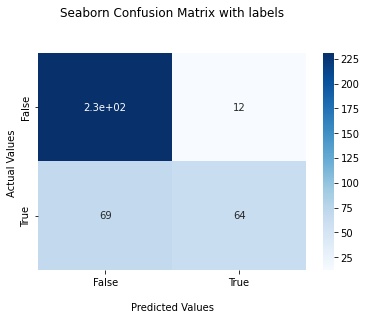

In [ ]:
import seaborn as sns

ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')

ax.set_title('Seaborn Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()